<a href="https://colab.research.google.com/github/Xylenox/CAP4630/blob/master/HW_3/HW3_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

## functions for graphing heatmaps

In [2]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
  
def f(x, y, w1, w2, b):
  res = np.zeros(x.shape)
  for i in range(0, x.shape[0]):
    for j in range(0, x.shape[1]):
      res[i][j] = sigmoid(x[i][j]*w1 + y[i][j]*w2 + b)
  return res

print(sigmoid(np.array([0, -1, 1])))

[0.5        0.26894142 0.73105858]


# Random data generation (Problem 1)


In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m, 2))
  labels = np.zeros((m, 1))

  for i in range(0, m):
    rand = np.random.random()
    c = 0
    if rand > 0.5:
      c = 0
    else:
      c = 1
    x = np.random.random()
    n = np.random.normal(mu, sigma)
    y = w*x + b + ((-1)**c) * n
    data[i][0] = x
    data[i][1] = y
    labels[i] = c
  return (data, labels)

def display_random_data(data, labels, w, b, m, ax):
  for i in range(0, m):
    if labels[i] == 0:
      ax.plot(data[i][0], data[i][1], 'r.')
    else:
      ax.plot(data[i][0], data[i][1], 'b.')

## Generating random data

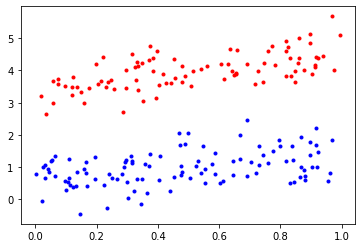

In [4]:
w = 1
b = 2
mu = 1.5
sigma = 0.5
m = 200
test = int(m*0.8)

data, labels = get_random_data(w, b, mu, sigma, m)

data_train = data[:test]
labels_train = labels[:test]
data_test = data[test:]
labels_test = labels[test:]
display_random_data(data, labels, w, b, m, plt)

# Logistic Regression with Keras (Problem 2)

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow.keras as keras
import tensorflow as tf

## Build and compile network

In [0]:
network = models.Sequential()
layer = layers.Dense(1, activation='sigmoid', input_shape=(2,))
network.add(layer)
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

## Train Network

In [8]:
network.fit(data_train, labels_train, epochs=50, batch_size=5)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.5437
Epoch 2/50
32/32 [==============================] - 0s 952us/step - loss: 0.5537 - accuracy: 0.5813
Epoch 3/50
32/32 [==============================] - 0s 953us/step - loss: 0.4878 - accuracy: 0.6187
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.7000
Epoch 5/50
32/32 [==============================] - 0s 973us/step - loss: 0.4007 - accuracy: 0.7500
Epoch 6/50
32/32 [==============================] - 0s 973us/step - loss: 0.3748 - accuracy: 0.7750
Epoch 7/50
32/32 [==============================] - 0s 1000us/step - loss: 0.3567 - accuracy: 0.8438
Epoch 8/50
32/32 [==============================] - 0s 954us/step - loss: 0.3435 - accuracy: 0.8687
Epoch 9/50
32/32 [==============================] - 0s 978us/step - loss: 0.3335 - accuracy: 0.8938
Epoch 10/50
32/32 [==============================] - 0s 980us/step - loss: 0.3253 - accuracy: 0.9125
Ep

##  Binary Cross Entropy and Accuracy

In [9]:
test_loss, test_acc = network.evaluate(data_test, labels_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 1.0000


In [10]:
print(layer.weights)
print(layer.bias)

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.7998269],
       [-1.3249344]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.9078945], dtype=float32)>]
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.9078945], dtype=float32)>


## Formula for extracting seperating line given weights and bias

$w_1*x + w_2*y + b = 0$

$w_2*y = -w_1*x - b$

$y = -w_1*x/w_2 - b/w_2$

## Plotting network output and heatmap

tf.Tensor(1.4399917, shape=(), dtype=float32)
tf.Tensor(1.3584272, shape=(), dtype=float32)


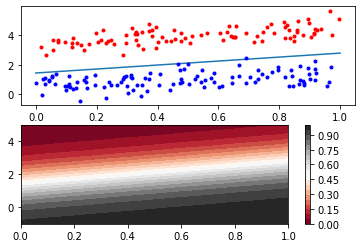

In [11]:
test_b = -layer.bias[0]/layer.weights[0][1][0]
test_w = -layer.weights[0][0][0]/layer.weights[0][1][0]
# display_random_data(data, labels, w, b, m)
print(test_b)
print(test_w)
ax = plt.subplot(2, 1, 1)
plt.plot(np.array([0, 1]), np.array([test_b, test_b+test_w]))
display_random_data(data, labels, w, b, m, ax)


x = np.linspace(0, 1, 20)
y = np.linspace(-1, 5, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, layer.weights[0][0][0], layer.weights[0][1][0], layer.bias[0])

ax = plt.subplot(2, 1, 2)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

# Manual Logistic Regression (Problem 3)

## Initialize weights

In [0]:
ws = np.zeros(3)
lr = 0.01
epochs = 20
batch_size = 20

## Loss and accuracy

In [0]:
import math
def loss(data, labels):
  loss = 0
  for i in range(0, data.shape[0]):
    yh = sigmoid((ws*data[i]).sum())
    loss += -labels[i][0]*math.log(yh) - (1-labels[i][0])*math.log(1-yh)
  loss /= data.shape[0]
  return loss

def accuracy(data, labels):
  tot = 0
  for i in range(0, data.shape[0]):
    yh = sigmoid((ws*data[i]).sum())
    if (yh > 0.5) == (labels[i][0] == 1):
      tot = tot+1
  return tot/data.shape[0]

## Run epochs

In [14]:
datab = np.hstack((data_train, np.ones((data_train.shape[0], 1))))
for epoch in range(0, epochs):
  shuffle = np.random.permutation(datab.shape[0])
  sample_data = datab[shuffle]
  sample_labels = labels_train[shuffle]
  for i in range(0, m, batch_size):
    datas = sample_data[i:i+batch_size]
    label = sample_labels[i:i+batch_size]
    ws = (ws - 1 / test * np.sum((np.array([sigmoid(datas.dot(ws))]).T - label)*datas, axis=0))
  print("loss: " + str(loss(datab, labels_train)) + ", accuracy: " + str(accuracy(datab, labels_train)))
# loss(datab, labels_train)

loss: 0.5425797477588744, accuracy: 0.53125
loss: 0.4936378448268446, accuracy: 0.7125
loss: 0.4509124268447776, accuracy: 0.7875
loss: 0.4149520947221418, accuracy: 0.8625
loss: 0.3834812364328003, accuracy: 0.925
loss: 0.35619161934759935, accuracy: 0.95
loss: 0.33189942212402274, accuracy: 0.95625
loss: 0.31076873834022495, accuracy: 0.975
loss: 0.29209549316185845, accuracy: 0.975
loss: 0.27548677784031206, accuracy: 0.975
loss: 0.26063938647868884, accuracy: 0.98125
loss: 0.2474259130775101, accuracy: 0.9875
loss: 0.23531916921516066, accuracy: 0.9875
loss: 0.22440797374230242, accuracy: 0.9875
loss: 0.21449681097120604, accuracy: 0.9875
loss: 0.2054618420290021, accuracy: 0.9875
loss: 0.19717707952116678, accuracy: 0.99375
loss: 0.18956858487174605, accuracy: 0.99375
loss: 0.18253591529965812, accuracy: 0.99375
loss: 0.17603545725535558, accuracy: 0.99375


## Loss and accuracy on test data

In [15]:
datab_test = np.hstack((data_test, np.ones((data_test.shape[0], 1))))
print("test loss: " + str(loss(datab_test, labels_test)) + ", test accuracy: " + str(accuracy(datab_test, labels_test)))

test loss: 0.17550322225897133, test accuracy: 1.0


# Plot predictions and heatmap

1.7144128960684837
0.8389042759187074


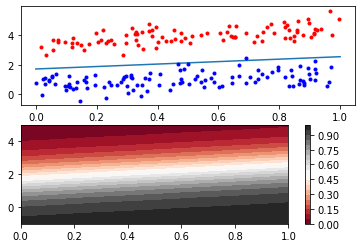

In [16]:
test_b = -ws[2]/ws[1]
test_w = -ws[0]/ws[1]
# display_random_data(data, labels, w, b, m)
print(test_b)
print(test_w)
ax = plt.subplot(2, 1, 1)
plt.plot(np.array([0, 1]), np.array([test_b, test_b+test_w]))
display_random_data(data, labels, w, b, m, ax)


x = np.linspace(0, 1, 20)
y = np.linspace(-1, 5, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, ws[0], ws[1], ws[2])

ax = plt.subplot(2, 1, 2)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()